Hey everyone!
So this is a project which is based on real transactions and in this project we are going to predict that if particular transaction is legitimate or fraudlent.


In [ ]:
# importing necessary dependacies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
credit_card_df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dataset Understanding
I took the dataset from Kaggle and this dataset contains transactions made by credit cards in September 2013 by European cardholders.
But for some confidentiality reasons the real transactions values are hidden.

It contains only numerical input variables which are the result of a PCA transformation.
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

In [4]:
credit_card_df.shape

(284807, 31)

In [5]:
credit_card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_card_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
credit_card_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

So as we can see that the data does not contain any missing values and hence, it does not require any value to be handled.

The dataset has only Target Variable class as the categorical values in which,
0 represents Legitimate Transaction and
1 represents Fraudlent Transaction.


But as we can see this dataset is highly unbalanced as the legitimate transaction are almost 3 lakhs whereas the fraudlent transactions is 492.
so we can't train our model with these values.

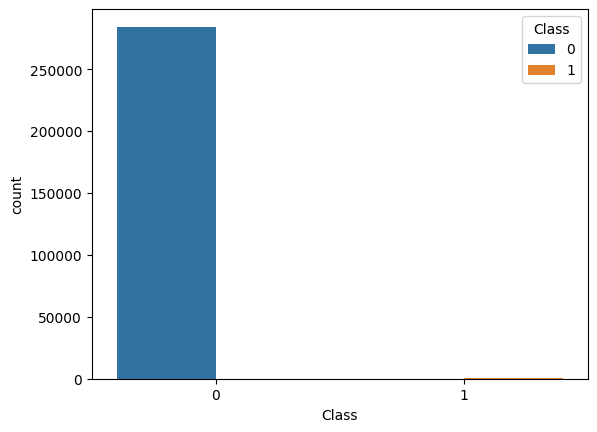

In [9]:
sns.countplot(x = 'Class', data = credit_card_df, hue = "Class")

plt.show()

Insights:



*   The dataset has 32 columns with unknown features lablled V1 to V28, Time , Amount and Class
and the dataset is highly unbalanced




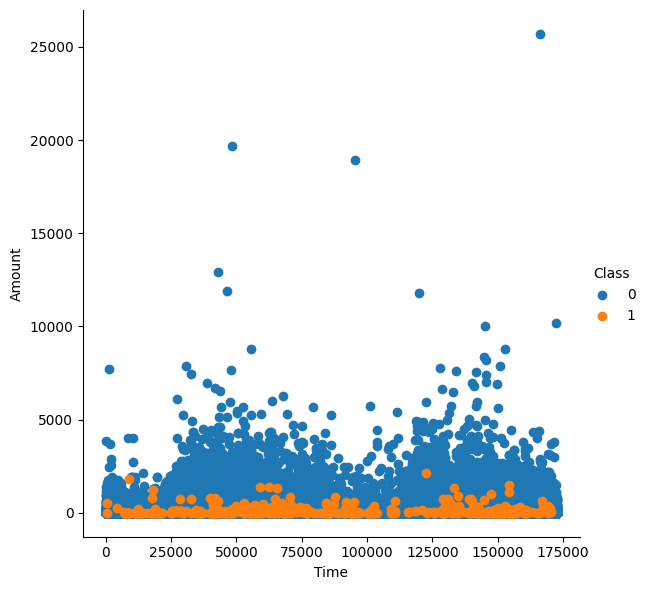

In [10]:
sns.FacetGrid(credit_card_df, hue="Class",height=6).map(plt.scatter,"Time","Amount").add_legend()
plt.show()

Now from this scatter plot graph, we get to know one thing that the amount of fraudlent transactions are not more than 2500

Now we have to prove our hypothesis

In [11]:
amount_more = 0
amount_less = 0
for i in range(credit_card_df.shape[0]):
  if(credit_card_df.iloc[i]["Amount"] < 2500):
    amount_less +=1
  else:
    amount_more +=1
print(amount_less)
print(amount_more)

284358
449


In [12]:
percentage_less = (amount_less/credit_card_df.shape[0])*100
percentage_less

99.84234938045763

Here we can observe that the 99.85% of transactions amount to less than 2500.
Let us see how many of these are fraud and others are legitimate.

In [13]:
fraud = 0
legitimate = 0

for i in range(credit_card_df.shape[0]):
  if(credit_card_df.iloc[i]["Amount"] < 2500):
    if(credit_card_df.iloc[i]["Class"] == 0):
      legitimate += 1
    else:
      fraud += 1

print(fraud)
print(legitimate)

492
283866


Are as we can see that the number of fraud transactions are 492 which is the same of the total number of fraudlent transactions.
Hence we can say that all the fraudlent transactions amount are less than 2500.

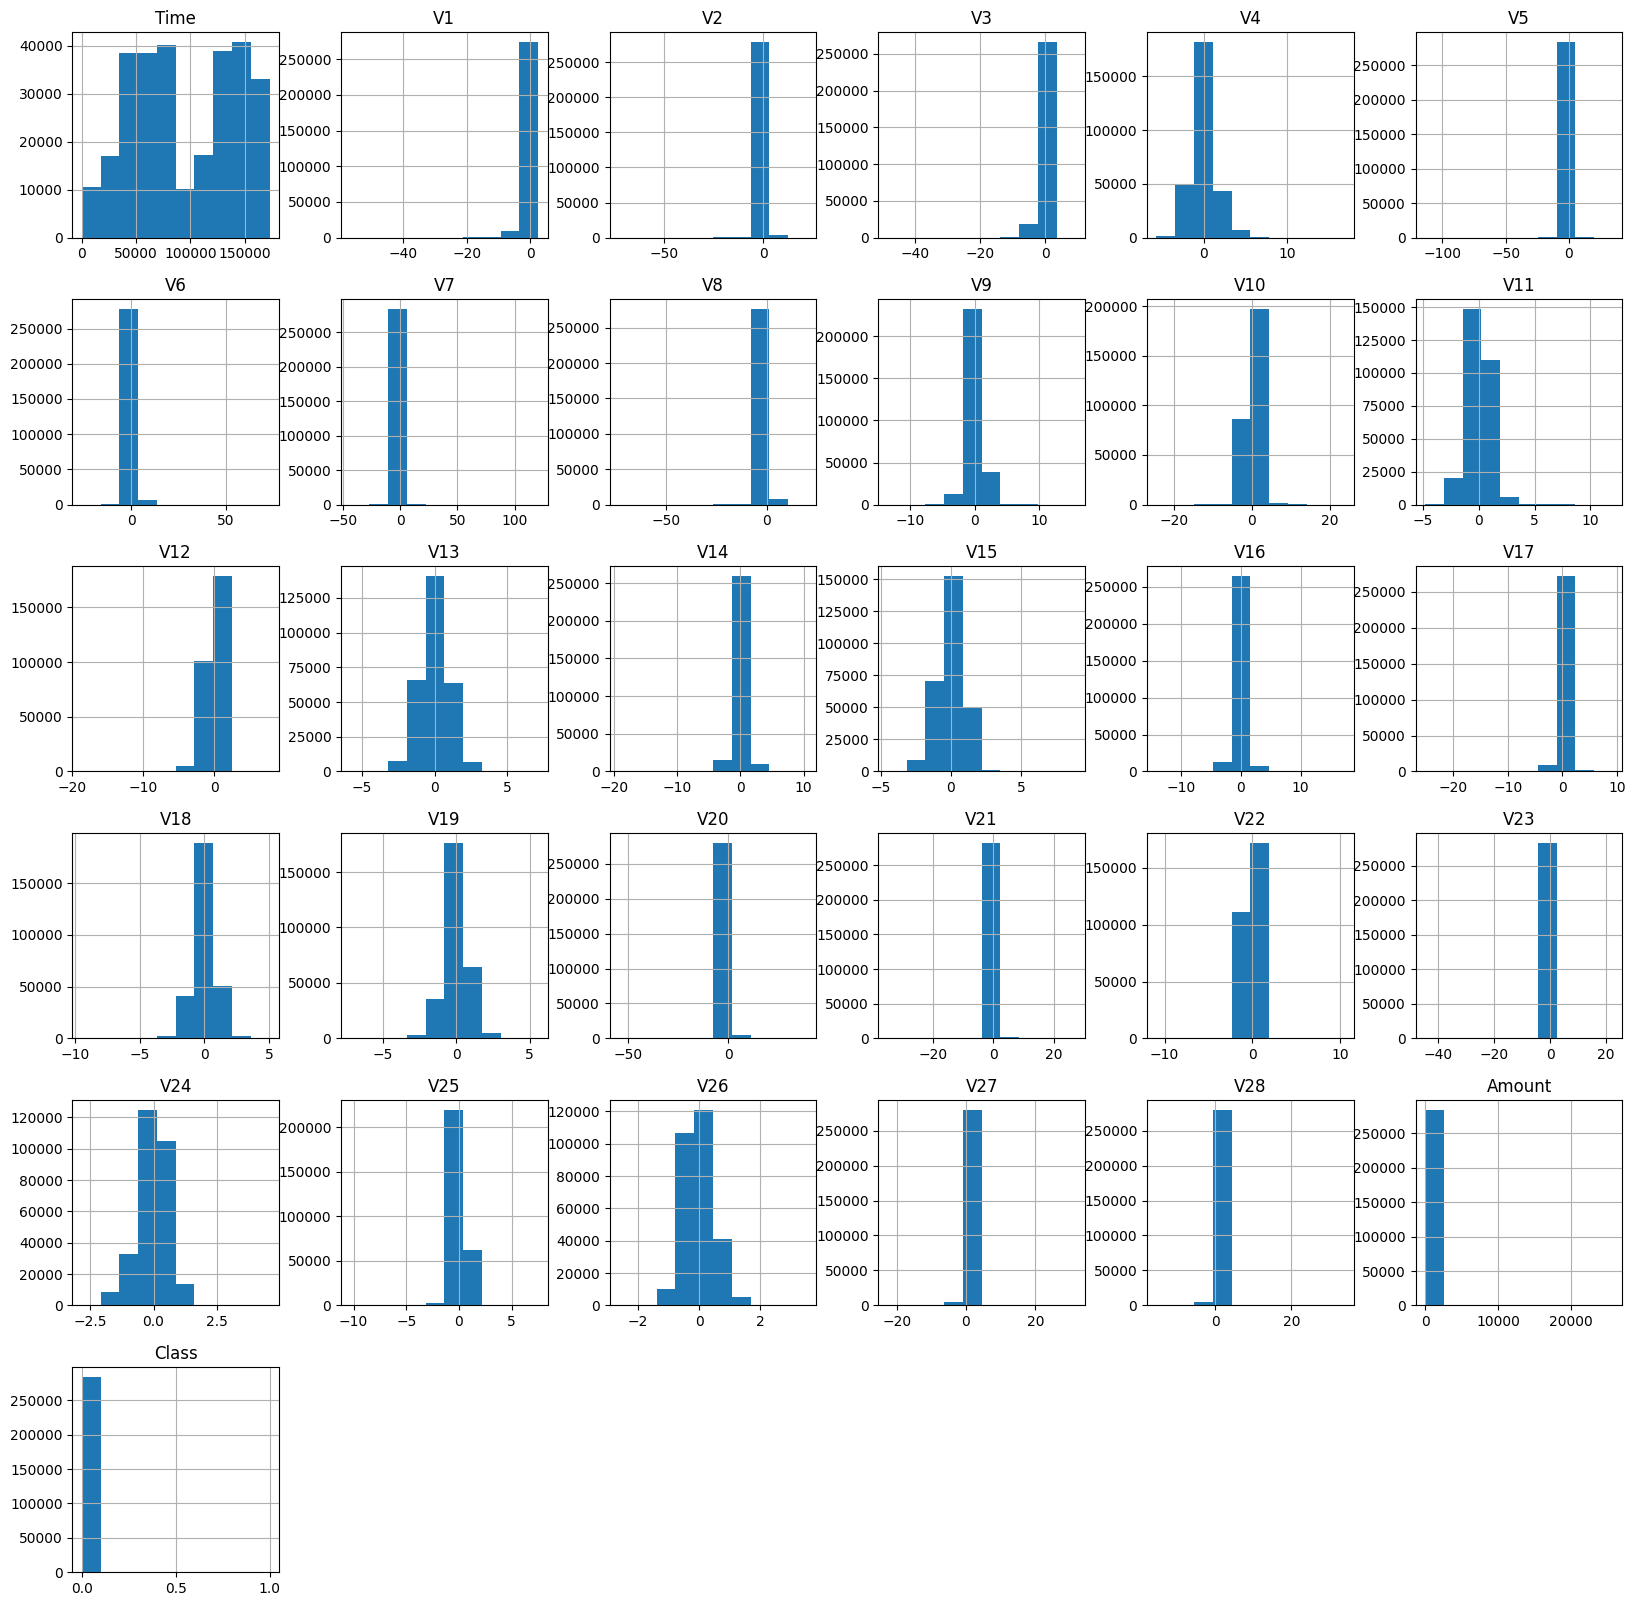

In [36]:
credit_card_df.hist(figsize = (20, 20))
plt.show()

In [14]:
temp_df = credit_card_df[["Time", "Amount", "Class"]]

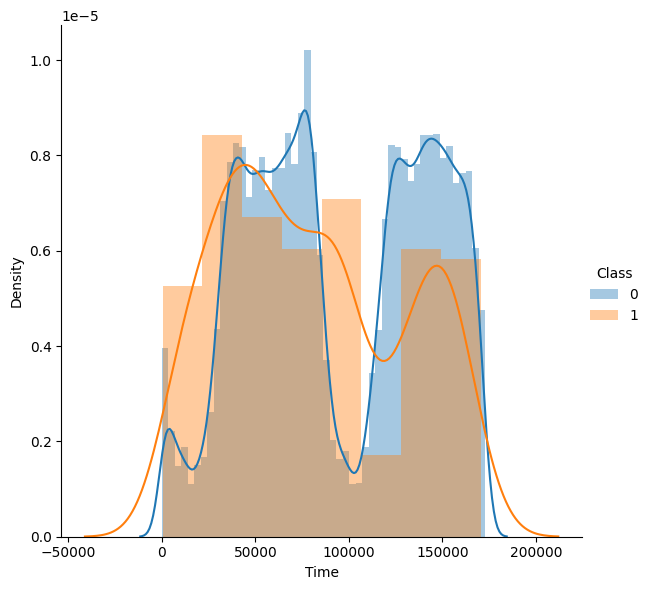

In [15]:
sns.FacetGrid(temp_df, hue = "Class", height = 6).map(sns.distplot, "Time").add_legend()
plt.show()

<Axes: >

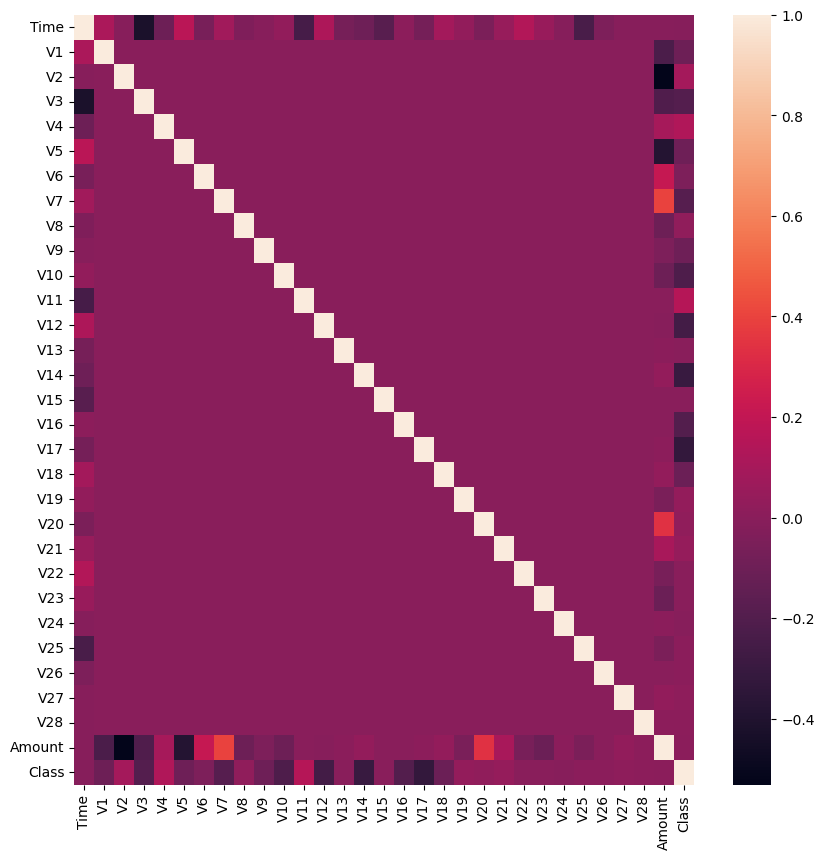

In [16]:
plt.figure(figsize=(10,10))
df_corr = credit_card_df.corr()
sns.heatmap(df_corr)

Now we need to balance the fraud and the legititmate transactions in data




In [17]:
X = credit_card_df.drop('Class', axis=1)  # Features
y = credit_card_df['Class']               # Target variable

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Apply SMOTE or any other preprocessing only on the training set
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Now X_res and y_res are used for training, and X_test for testing


In [18]:
print(X_train.shape, X_test.shape, X.shape)
print(y_train.shape)

(199364, 30) (85443, 30) (284807, 30)
(199364,)


In [19]:
y_train.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [20]:
print(X_res.shape, y_res.shape)

(398040, 30) (398040,)


In [21]:
y_res.value_counts()

Class
0    199020
1    199020
Name: count, dtype: int64

In [22]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data = mutual_info_classif(X_res, y_res, discrete_features = False, random_state = 1), index = X_train.columns)

In [23]:
mutual_infos.sort_values(ascending = False)

V14       0.535044
V10       0.464775
V12       0.456052
V17       0.438193
V4        0.427427
V11       0.404040
Amount    0.392909
V3        0.387187
V16       0.335317
V7        0.304171
V2        0.291484
V9        0.256678
Time      0.247989
V21       0.235010
V27       0.229914
V1        0.220736
V18       0.198262
V8        0.174371
V6        0.171973
V28       0.170495
V5        0.157362
V20       0.107488
V19       0.099836
V23       0.067332
V24       0.063567
V26       0.046974
V25       0.031606
V22       0.031539
V13       0.024931
V15       0.022442
dtype: float64

Hence, we can say that the most correlated features after resolving class imbalance using SMOTE are V14, V10, V4, V12 and V17

In [24]:
df_res = pd.DataFrame(X_res,columns = X_train.columns)
df_res['Class'] = y_res

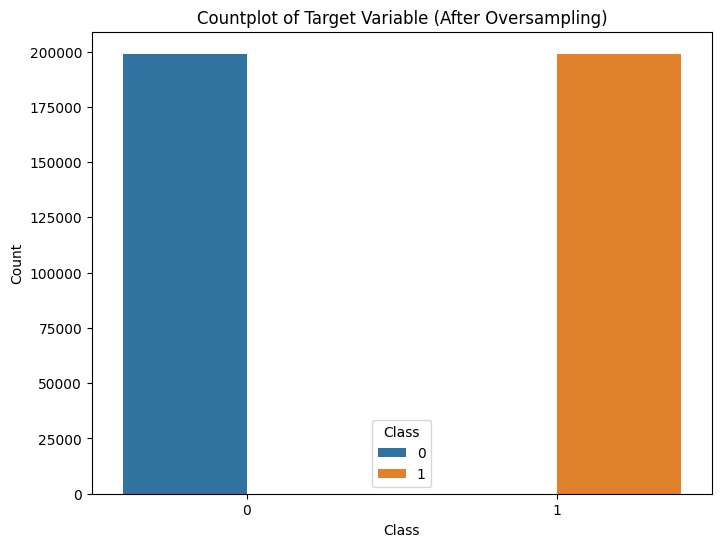

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=df_res, hue = "Class")
plt.title('Countplot of Target Variable (After Oversampling)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [26]:
increase_X = X_res.shape[0] - X_train.shape[0]
increase_y = len(y_res) - len(y_train)

print("Increase in X values after applying SMOTE:", increase_X)
print("Increase in y values after applying SMOTE:", increase_y)


Increase in X values after applying SMOTE: 198676
Increase in y values after applying SMOTE: 198676


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
logistic_model.fit(X_res, y_res)  # Use resampled training data

# Predictions and probabilities for the training data
y_pred_train = logistic_model.predict(X_res)
y_pred_proba_train = logistic_model.predict_proba(X_res)[:, 1]

# Predictions and probabilities for the test data
y_pred_test = logistic_model.predict(X_test)
y_pred_proba_test = logistic_model.predict_proba(X_test)[:, 1]

# Calculate metrics for the training data
accuracy_train = accuracy_score(y_res, y_pred_train)
roc_auc_train = roc_auc_score(y_res, y_pred_proba_train)
f1_train = f1_score(y_res, y_pred_train)

# Calculate metrics for the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the training data evaluation metrics
print("Training Data Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"ROC AUC Score: {roc_auc_train}")
print(f"F1 Score: {f1_train}\n")

# Print the test data evaluation metrics
print("Test Data Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"ROC AUC Score: {roc_auc_test}")
print(f"F1 Score: {f1_test}")


Training Data Metrics:
Accuracy: 0.975479851271229
ROC AUC Score: 0.9959223049060385
F1 Score: 0.9752303124127605

Test Data Metrics:
Accuracy: 0.9858034010978078
ROC AUC Score: 0.9814588637526677
F1 Score: 0.18095881161377447


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Initialize the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Train the model on the resampled training data
gnb_model.fit(X_res, y_res)

# Predictions for the training data
y_pred_train_gnb = gnb_model.predict(X_res)

# Predictions for the test data
y_pred_test_gnb = gnb_model.predict(X_test)

# Calculate metrics for the training data
accuracy_train_gnb = accuracy_score(y_res, y_pred_train_gnb)
f1_train_gnb = f1_score(y_res, y_pred_train_gnb)
classification_report_train_gnb = classification_report(y_res, y_pred_train_gnb)

# Calculate metrics for the test data
accuracy_test_gnb = accuracy_score(y_test, y_pred_test_gnb)
f1_test_gnb = f1_score(y_test, y_pred_test_gnb)
classification_report_test_gnb = classification_report(y_test, y_pred_test_gnb)

# Print the training data evaluation metrics
print("Gaussian Naive Bayes Training Data Metrics:")
print(f"Accuracy: {accuracy_train_gnb}")
print(f"F1 Score: {f1_train_gnb}")
print("Classification Report (Training):")
print(classification_report_train_gnb)

# Print the test data evaluation metrics
print("Gaussian Naive Bayes Test Data Metrics:")
print(f"Accuracy: {accuracy_test_gnb}")
print(f"F1 Score: {f1_test_gnb}")
print("Classification Report (Test):")
print(classification_report_test_gnb)


Gaussian Naive Bayes Training Data Metrics:
Accuracy: 0.8628931765651693
F1 Score: 0.8425138226772708
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.79      0.99      0.88    199020
           1       0.99      0.73      0.84    199020

    accuracy                           0.86    398040
   macro avg       0.89      0.86      0.86    398040
weighted avg       0.89      0.86      0.86    398040

Gaussian Naive Bayes Test Data Metrics:
Accuracy: 0.9919010334374964
F1 Score: 0.25751072961373395
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.81      0.26       148

    accuracy                           0.99     85443
   macro avg       0.58      0.90      0.63     85443
weighted avg       1.00      0.99      0.99     85443



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Train the model on the resampled training data
dt_model.fit(X_res, y_res)

# Predictions for the training data
y_pred_train_dt = dt_model.predict(X_res)

# Predictions for the test data
y_pred_test_dt = dt_model.predict(X_test)

# Calculate metrics for the training data
accuracy_train_dt = accuracy_score(y_res, y_pred_train_dt)
f1_train_dt = f1_score(y_res, y_pred_train_dt)
classification_report_train_dt = classification_report(y_res, y_pred_train_dt)

# Calculate metrics for the test data
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
f1_test_dt = f1_score(y_test, y_pred_test_dt)
classification_report_test_dt = classification_report(y_test, y_pred_test_dt)

# Print the training data evaluation metrics
print("Decision Tree Classifier Training Data Metrics:")
print(f"Accuracy: {accuracy_train_dt}")
print(f"F1 Score: {f1_train_dt}")
print("Classification Report (Training):")
print(classification_report_train_dt)

# Print the test data evaluation metrics
print("Decision Tree Classifier Test Data Metrics:")
print(f"Accuracy: {accuracy_test_dt}")
print(f"F1 Score: {f1_test_dt}")
print("Classification Report (Test):")
print(classification_report_test_dt)


Decision Tree Classifier Training Data Metrics:
Accuracy: 1.0
F1 Score: 1.0
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Decision Tree Classifier Test Data Metrics:
Accuracy: 0.997940147232658
F1 Score: 0.5925925925925926
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.45      0.86      0.59       148

    accuracy                           1.00     85443
   macro avg       0.73      0.93      0.80     85443
weighted avg       1.00      1.00      1.00     85443



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model on the resampled training data
rf_model.fit(X_res, y_res)

# Predictions for the training data
y_pred_train_rf = rf_model.predict(X_res)

# Predictions for the test data
y_pred_test_rf = rf_model.predict(X_test)

# Calculate metrics for the training data
accuracy_train_rf = accuracy_score(y_res, y_pred_train_rf)
f1_train_rf = f1_score(y_res, y_pred_train_rf)
classification_report_train_rf = classification_report(y_res, y_pred_train_rf)

# Calculate metrics for the test data
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
classification_report_test_rf = classification_report(y_test, y_pred_test_rf)

# Print the training data evaluation metrics
print("Random Forest Classifier Training Data Metrics:")
print(f"Accuracy: {accuracy_train_rf}")
print(f"F1 Score: {f1_train_rf}")
print("Classification Report (Training):")
print(classification_report_train_rf)

# Print the test data evaluation metrics
print("Random Forest Classifier Test Data Metrics:")
print(f"Accuracy: {accuracy_test_rf}")
print(f"F1 Score: {f1_test_rf}")
print("Classification Report (Test):")
print(classification_report_test_rf)


Random Forest Classifier Training Data Metrics:
Accuracy: 1.0
F1 Score: 1.0
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Random Forest Classifier Test Data Metrics:
Accuracy: 0.999602073897218
F1 Score: 0.8827586206896552
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.86      0.88       148

    accuracy                           1.00     85443
   macro avg       0.95      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Initialize the SGD Classifier
# Note: Using log loss to enable probability estimates for ROC AUC calculation
sgd_model = SGDClassifier(loss='log', max_iter=1000)

# Train the model on the resampled training data
sgd_model.fit(X_res, y_res)

# Predictions for the training data
y_pred_train_sgd = sgd_model.predict(X_res)

# Predictions for the test data
y_pred_test_sgd = sgd_model.predict(X_test)

# Calculate metrics for the training data
accuracy_train_sgd = accuracy_score(y_res, y_pred_train_sgd)
f1_train_sgd = f1_score(y_res, y_pred_train_sgd)
classification_report_train_sgd = classification_report(y_res, y_pred_train_sgd)

# Calculate metrics for the test data
accuracy_test_sgd = accuracy_score(y_test, y_pred_test_sgd)
f1_test_sgd = f1_score(y_test, y_pred_test_sgd)
classification_report_test_sgd = classification_report(y_test, y_pred_test_sgd)

# Print the training data evaluation metrics
print("SGDClassifier Training Data Metrics:")
print(f"Accuracy: {accuracy_train_sgd}")
print(f"F1 Score: {f1_train_sgd}")
print("Classification Report (Training):")
print(classification_report_train_sgd)

# Print the test data evaluation metrics
print("SGDClassifier Test Data Metrics:")
print(f"Accuracy: {accuracy_test_sgd}")
print(f"F1 Score: {f1_test_sgd}")
print("Classification Report (Test):")
print(classification_report_test_sgd)


SGDClassifier Training Data Metrics:
Accuracy: 0.9065445683850869
F1 Score: 0.8982797327857063
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.85      0.99      0.91    199020
           1       0.99      0.83      0.90    199020

    accuracy                           0.91    398040
   macro avg       0.92      0.91      0.91    398040
weighted avg       0.92      0.91      0.91    398040

SGDClassifier Test Data Metrics:
Accuracy: 0.9882143651323104
F1 Score: 0.20395256916996046
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.87      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Initialize the SVC model with probability estimates enabled for ROC AUC calculation
svc_model = SVC(probability=True, max_iter=1000)  # Increase max_iter if the model doesn't converge

# Train the model on the resampled training data
svc_model.fit(X_res, y_res)

# Predictions and probabilities for the training data
y_pred_train_svc = svc_model.predict(X_res)
y_pred_proba_train_svc = svc_model.predict_proba(X_res)[:, 1]

# Predictions and probabilities for the test data
y_pred_test_svc = svc_model.predict(X_test)
y_pred_proba_test_svc = svc_model.predict_proba(X_test)[:, 1]

# Calculate metrics for the training data
accuracy_train_svc = accuracy_score(y_res, y_pred_train_svc)
roc_auc_train_svc = roc_auc_score(y_res, y_pred_proba_train_svc)
f1_train_svc = f1_score(y_res, y_pred_train_svc)

# Calculate metrics for the test data
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)
roc_auc_test_svc = roc_auc_score(y_test, y_pred_proba_test_svc)
f1_test_svc = f1_score(y_test, y_pred_test_svc)

# Print the training data evaluation metrics
print("SVC Model Training Data Metrics:")
print(f"Accuracy: {accuracy_train_svc}")
print(f"ROC AUC Score: {roc_auc_train_svc}")
print(f"F1 Score: {f1_train_svc}\n")

# Print the test data evaluation metrics
print("SVC Model Test Data Metrics:")
print(f"Accuracy: {accuracy_test_svc}")
print(f"ROC AUC Score: {roc_auc_test_svc}")
print(f"F1 Score: {f1_test_svc}")


SVC Model Training Data Metrics:
Accuracy: 0.4678600140689378
ROC AUC Score: 0.434963234152442
F1 Score: 0.49589337775926706

SVC Model Test Data Metrics:
Accuracy: 0.4088573668995705
ROC AUC Score: 0.3988811881815575
F1 Score: 0.0026853588705696516


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Initialize the KNeighbors Classifier
knn_model = KNeighborsClassifier()

# Train the model on the resampled training data
knn_model.fit(X_res, y_res)

# Predictions for the training data
y_pred_train_knn = knn_model.predict(X_res)

# Predictions for the test data
y_pred_test_knn = knn_model.predict(X_test)

# Calculate metrics for the training data
accuracy_train_knn = accuracy_score(y_res, y_pred_train_knn)
f1_train_knn = f1_score(y_res, y_pred_train_knn)
classification_report_train_knn = classification_report(y_res, y_pred_train_knn)

# Calculate metrics for the test data
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
f1_test_knn = f1_score(y_test, y_pred_test_knn)
classification_report_test_knn = classification_report(y_test, y_pred_test_knn)

# Print the training data evaluation metrics
print("KNeighbors Classifier Training Data Metrics:")
print(f"Accuracy: {accuracy_train_knn}")
print(f"F1 Score: {f1_train_knn}")
print("Classification Report (Training):")
print(classification_report_train_knn)

# Print the test data evaluation metrics
print("KNeighbors Classifier Test Data Metrics:")
print(f"Accuracy: {accuracy_test_knn}")
print(f"F1 Score: {f1_test_knn}")
print("Classification Report (Test):")
print(classification_report_test_knn)


KNeighbors Classifier Training Data Metrics:
Accuracy: 0.9738267510802935
F1 Score: 0.9741866745955053
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    199020
           1       0.96      0.99      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040

KNeighbors Classifier Test Data Metrics:
Accuracy: 0.939737602846342
F1 Score: 0.031232361241768578
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.02      0.56      0.03       148

    accuracy                           0.94     85443
   macro avg       0.51      0.75      0.50     85443
weighted avg       1.00      0.94      0.97     85443



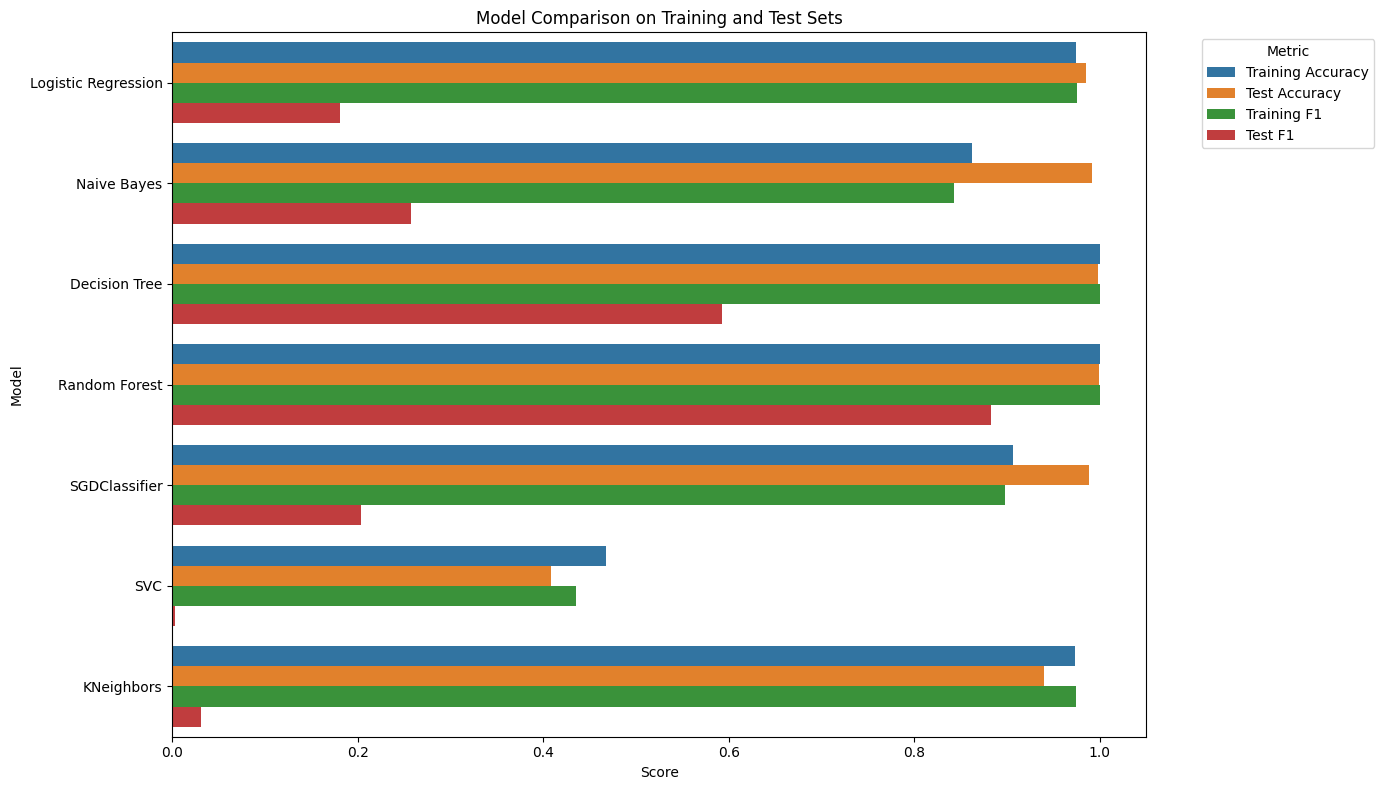

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example metrics from models (replace with your actual metrics)
model_metrics = {
    'Model': ['Logistic Regression', 'Naive Bayes','Decision Tree', 'Random Forest', 'SGDClassifier', 'SVC','KNeighbors'],
    'Training Accuracy': [0.9745,0.8628,1.0,1.0,0.9065,0.4678,0.9738],
    'Test Accuracy': [0.9858,0.9919,0.9979,0.9996,0.9882,0.4088,0.9397],
    'Training F1': [0.9752,0.8425,1.0,1.0,0.8982,0.4349,0.9741],
    'Test F1': [0.1809,0.2575,0.5925,0.8827,0.2039,0.0026,0.0312],
}

# Convert to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Score', y='Model', hue='Metric', data=df_melted)
plt.title('Model Comparison on Training and Test Sets')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [41]:
# Identify the model with the highest Test F1 Score
max_test_f1_index = df_metrics['Test F1'].idxmax()
best_model = df_metrics.iloc[max_test_f1_index]

print(f"The best performing model based on Test F1 Score is {best_model['Model']} with a Test F1 Score of {best_model['Test F1']:.2f}.")


The best performing model based on Test F1 Score is Random Forest with a Test F1 Score of 0.88.


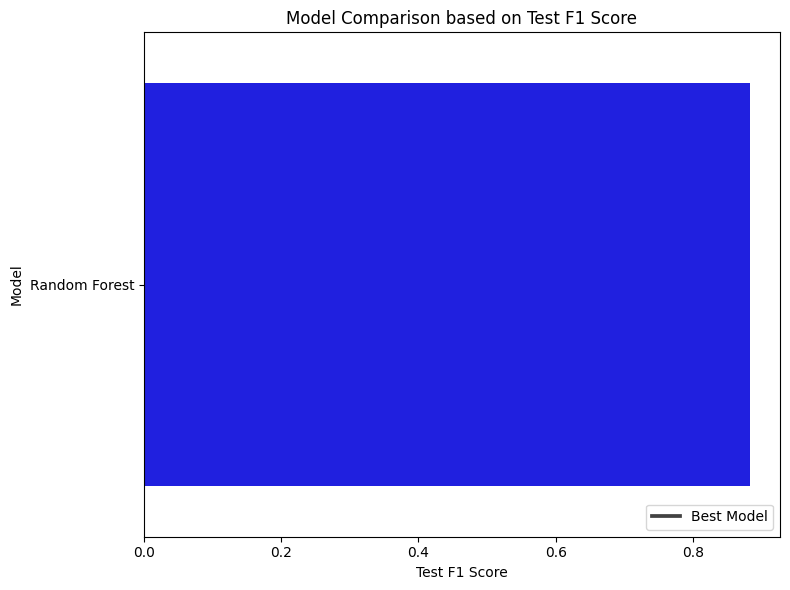

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example metrics from models (replace with your actual metrics)
model_metrics = {
    'Model': ['Logistic Regression', 'Naive Bayes','Decision Tree', 'Random Forest', 'SGDClassifier', 'SVC','KNeighbors'],
    'Training Accuracy': [0.9745,0.8628,1.0,1.0,0.9065,0.4678,0.9738],
    'Test Accuracy': [0.9858,0.9919,0.9979,0.9996,0.9882,0.4088,0.9397],
    'Training F1': [0.9752,0.8425,1.0,1.0,0.8982,0.4349,0.9741],
    'Test F1': [0.1809,0.2575,0.5925,0.8827,0.2039,0.0026,0.0312],
}

# Convert to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Find the best model based on Test F1 Score
best_model_index = df_metrics['Test F1'].idxmax()
best_model_name = df_metrics.loc[best_model_index, 'Model']

# Create a new column to highlight the best model in the plot
df_metrics['Highlight'] = df_metrics['Model'] == best_model_name

# Plot
plt.figure(figsize=(8,6))
# Plot all models with a default color
sns.barplot(x='Test F1', y='Model', data=df_metrics, color='lightgrey')
# Overlay the best model with a different color
sns.barplot(x='Test F1', y='Model', data=df_metrics[df_metrics['Model'] == best_model_name], color='blue')
plt.title('Model Comparison based on Test F1 Score')
plt.xlabel('Test F1 Score')
plt.ylabel('Model')
plt.tight_layout()

# Add a legend to explain the highlight
plt.legend(['Best Model'], loc='lower right')

plt.show()


So, Random Forest performed the best out of all the Machine Learning Models.